In [1]:
import skimage.data
import skimage.transform
 
import os
import numpy as np
import cv2
import pickle
from imutils import paths

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.models import Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.engine.input_layer import Input
from keras.utils.vis_utils import plot_model
from keras import backend as K

# set the matplotlib backend so figures can be saved in the background
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
matplotlib.use("Agg")
# Allow image embeding in notebook
%matplotlib inline

Using TensorFlow backend.


In [2]:
#data set paths
BTS_ROOT = '/media/prithvi/DATA/acads/NNFL/assignment 2/BelgiumTS datasets/'
BTSC_TRAINING = os.path.join(BTS_ROOT,"BelgiumTSC_Training")
BTSC_TESTING= os.path.join(BTS_ROOT,"BelgiumTSC_Testing")
BTSC_TRAINING_SMALL = os.path.join(BTS_ROOT,"BelgiumTSC_Training_small")

In [3]:
#function to load data from data_dir
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [4]:
#loading the data
# images, labels = load_data(BTSC_TRAINING)
images, labels = load_data(BTSC_TRAINING)

In [5]:
#storing first image of each class
classrep=[]
unique= set(labels)

for label in unique:
    classrep.append(images[labels.index(label)])


In [6]:
e = []
e.append(skimage.data.imread('example1.ppm'))
e.append(skimage.data.imread('example2.ppm'))
e.append(skimage.data.imread('example3.ppm'))
e.append(skimage.data.imread('example4.ppm'))

In [7]:
# load the model and label binarizer
model = load_model("model_dropout25")
lb = pickle.loads(open("binarizer", "rb").read())

In [11]:
# make a prediction on the image
preds = model.predict(np.array([cv2.resize(im,(48,48)) for im in e],dtype='float')/255.0)
 
# find the class label index with the largest corresponding
# probability
i = preds.argmax(axis=1)
pred_labels = lb.classes_[i]
print(pred_labels)

[21 35 14 42]


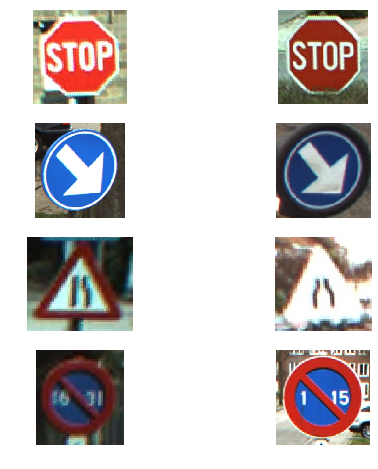

In [12]:
plt.figure(figsize=(8,8))
for i in range(0,4):
    plt.subplot(4,2,2*i+1)
    plt.imshow(e[i],aspect="equal")
    plt.axis("off");
    plt.subplot(4,2,2*i+2)
    plt.imshow(classrep[pred_labels[i]])
    plt.axis('off');
    
